CRISIS MULTIMODAL CLASSIFICATION SYSTEM
Device: cuda
CUDA available: True
GPU: Tesla T4

Loading datasets...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

informative/train.json:   0%|          | 0.00/5.49M [00:00<?, ?B/s]

informative/dev.json:   0%|          | 0.00/906k [00:00<?, ?B/s]

informative/test.json:   0%|          | 0.00/905k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13608 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/2237 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2237 [00:00<?, ? examples/s]


PART 1: TEXT CLASSIFIER - INFORMATIVE VS NON-INFORMATIVE TWEETS


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]


Dataset Statistics:
  Train samples: 12000
  Val samples: 2000
  Test samples: 2000
  Classes: 2 (Informative, Non-informative)
  Class distribution: [7316, 4684]
  Class weights: [0.8201203 1.2809565]


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training Text Classifier...
----------------------------------------------------------------------


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1,Weighted F1
1,0.557900,0.556325,0.720000,0.701964,0.720953
2,0.448600,0.577451,0.750000,0.726346,0.747184
3,0.238100,0.735671,0.738500,0.715294,0.736346



TEXT CLASSIFIER - TEST SET RESULTS
                 precision    recall  f1-score   support

    Informative     0.7652    0.8327    0.7975      1237
Non-informative     0.6835    0.5858    0.6309       763

       accuracy                         0.7385      2000
      macro avg     0.7244    0.7093    0.7142      2000
   weighted avg     0.7340    0.7385    0.7340      2000



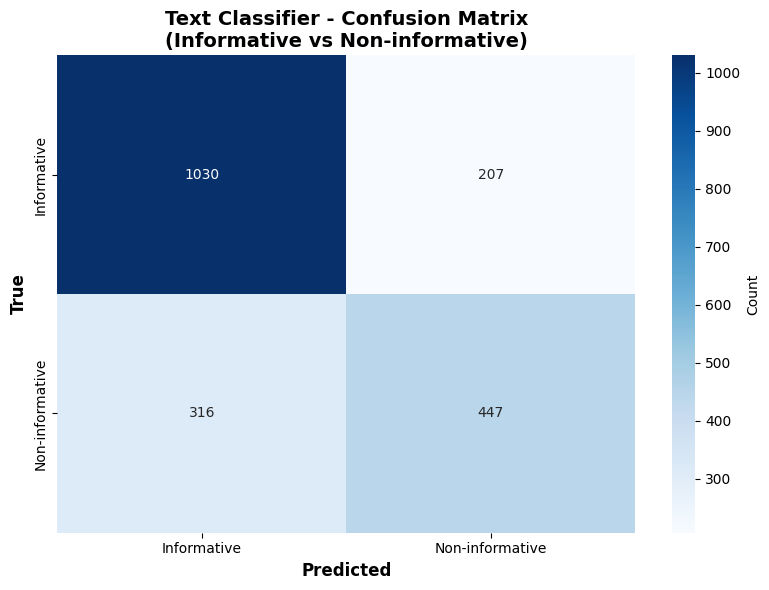


✓ Text classifier trained successfully!
  Macro F1: 0.7142
  Weighted F1: 0.7340
  Accuracy: 0.7385

PART 2: MULTIMODAL CLASSIFIER - HUMANITARIAN CATEGORIES


humanitarian/train.json:   0%|          | 0.00/5.66M [00:00<?, ?B/s]

humanitarian/dev.json:   0%|          | 0.00/931k [00:00<?, ?B/s]

humanitarian/test.json:   0%|          | 0.00/931k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13608 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/2237 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2237 [00:00<?, ? examples/s]


Filtering rare classes (< 50 samples): {3}


Filter:   0%|          | 0/12000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2000 [00:00<?, ? examples/s]


Dataset Statistics:
  Train samples: 11978
  Val samples: 1996
  Test samples: 1996
  Classes: 7 humanitarian categories
  Class distribution: [381, 1686, 210, 4636, 2875, 2068, 122]
  Class weights: [ 4.4911885   1.0149127   8.148299    0.369099    0.59518015  0.82743853
 14.025761  ]


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]


Model Architecture:
  Text encoder: google-bert/bert-base-uncased
  Image encoder: efficientnet_b0.ra_in1k
  Fusion: Cross-modal attention
  Total parameters: 115,988,867

Training Multimodal Classifier...
----------------------------------------------------------------------
Epoch 1/6 | Loss: 1.3413 | Val Macro F1: 0.1766 | Val Weighted F1: 0.2117 | Val Acc: 0.2806
Epoch 2/6 | Loss: 1.0908 | Val Macro F1: 0.3758 | Val Weighted F1: 0.4278 | Val Acc: 0.4364
Epoch 3/6 | Loss: 0.9266 | Val Macro F1: 0.3525 | Val Weighted F1: 0.4094 | Val Acc: 0.4043
Epoch 4/6 | Loss: 0.7437 | Val Macro F1: 0.4474 | Val Weighted F1: 0.5113 | Val Acc: 0.5115
Epoch 5/6 | Loss: 0.5591 | Val Macro F1: 0.4043 | Val Weighted F1: 0.4580 | Val Acc: 0.4619
Epoch 6/6 | Loss: 0.4084 | Val Macro F1: 0.4063 | Val Weighted F1: 0.4755 | Val Acc: 0.4765

✓ Loaded best model (val macro F1: 0.4474)

MULTIMODAL CLASSIFIER TEST SET RESULTS
                         precision    recall  f1-score   support

   Affected individu

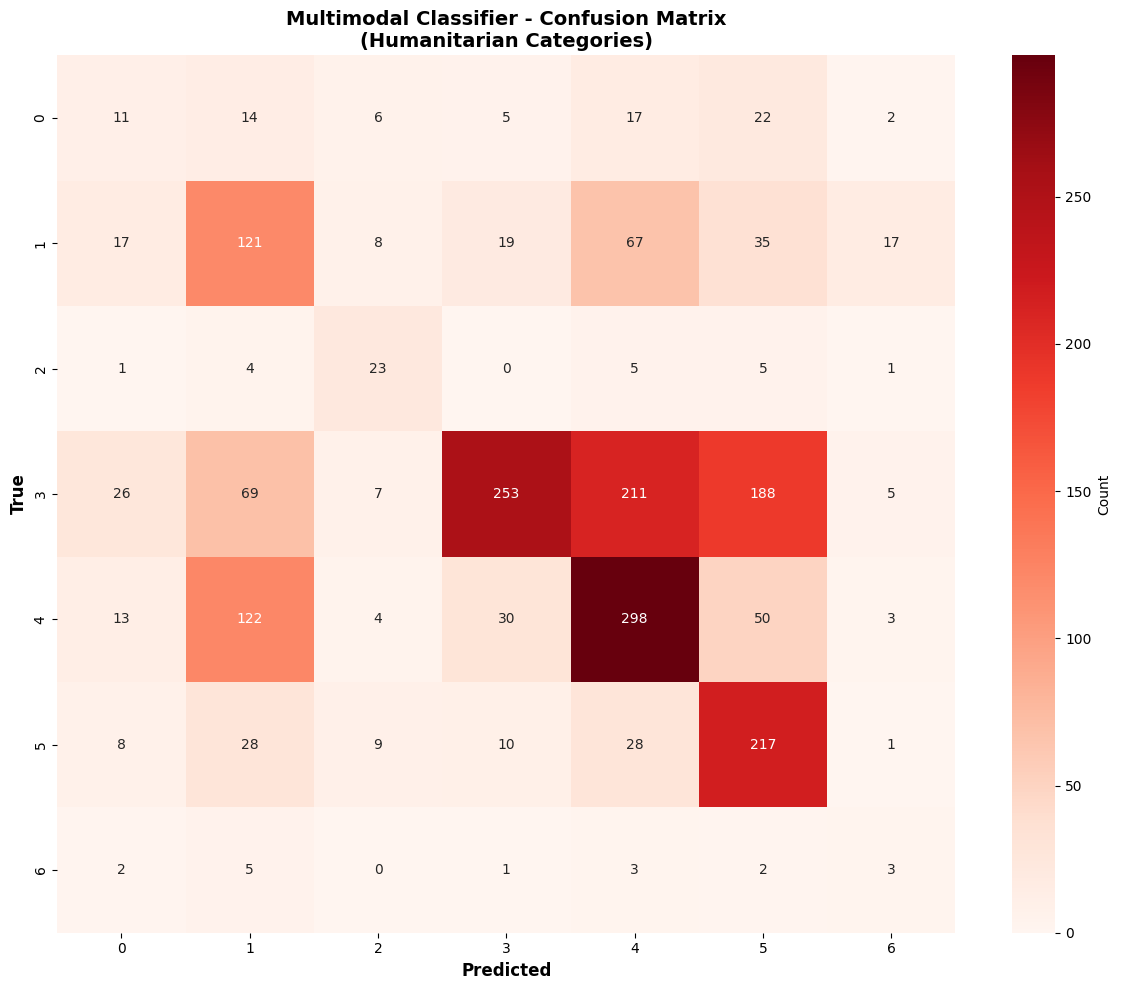


Multimodal classifier evaluated!
  Macro F1: 0.3768
  Weighted F1: 0.4627
  Accuracy: 0.4639


In [1]:
!pip install -q datasets transformers timm scikit-learn matplotlib seaborn pillow

import os, random, gc
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np
from datasets import load_dataset
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          AutoModel, TrainingArguments, Trainer)
import timm
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from dataclasses import dataclass
from collections import Counter

@dataclass
class Config:
    """Configuration for Crisis Multimodal Classification System"""
    dataset_name: str = "QCRI/CrisisMMD"
    text_subset: str = "informative"
    multi_subset: str = "humanitarian"
    text_model_name: str = "google-bert/bert-base-uncased"
    image_model_name: str = "efficientnet_b0.ra_in1k"
    max_length: int = 128
    train_batch_size: int = 16
    eval_batch_size: int = 32
    num_epochs_text: int = 3
    num_epochs_multi: int = 6
    lr_text: float = 2e-5
    lr_multi: float = 3e-5
    num_workers: int = 2
    seed: int = 42
    device: str = "cuda" if torch.cuda.is_available() else "cpu"
    image_size: int = 224
    max_train_samples: int = 12000
    max_val_samples: int = 2000
    max_test_samples: int = 2000
    warmup_ratio: float = 0.1
    weight_decay: float = 0.01
    focal_gamma: float = 3.0
    rare_class_threshold: int = 50

cfg = Config()

def set_seed(seed: int):
    """Set random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(cfg.seed)
device = torch.device(cfg.device)

print("="*70)
print("CRISIS MULTIMODAL CLASSIFICATION SYSTEM")
print("="*70)
print(f"Device: {device}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
print("="*70 + "\n")

print("Loading datasets...")
text_ds = load_dataset(cfg.dataset_name, cfg.text_subset)

def subset_splits(ds_dict, max_train, max_val, max_test):
    """Subset dataset splits to manageable sizes"""
    result = {}
    for split_name in ds_dict.keys():
        if "train" in split_name:
            n = min(max_train, len(ds_dict[split_name]))
        elif "dev" in split_name or "validation" in split_name:
            n = min(max_val, len(ds_dict[split_name]))
        else:
            n = min(max_test, len(ds_dict[split_name]))
        result[split_name] = ds_dict[split_name].select(range(n))
    return result

text_ds = subset_splits(text_ds, cfg.max_train_samples, cfg.max_val_samples, cfg.max_test_samples)

def prepare_splits(ds):
    """Prepare train/validation/test splits"""
    if "dev" in ds:
        return {"train": ds["train"], "validation": ds["dev"], "test": ds["test"]}
    elif "validation" in ds:
        return {"train": ds["train"], "validation": ds["validation"], "test": ds["test"]}
    else:
        split = ds["train"].train_test_split(test_size=0.15, seed=cfg.seed)
        return {
            "train": split["train"],
            "validation": split["test"],
            "test": ds["test"] if "test" in ds else split["test"]
        }

text_ds = prepare_splits(text_ds)

print("\n" + "="*70)
print("PART 1: TEXT CLASSIFIER - INFORMATIVE VS NON-INFORMATIVE TWEETS")
print("="*70)

text_tokenizer = AutoTokenizer.from_pretrained(cfg.text_model_name)

def preprocess_text(batch):
    """Tokenize text data"""
    texts = batch["tweet_text"]
    enc = text_tokenizer(texts, truncation=True, padding="max_length", max_length=cfg.max_length)
    enc["labels"] = batch["label"]
    return enc

from datasets import DatasetDict

text_ds_encoded = DatasetDict({
    "train": text_ds["train"].map(preprocess_text, batched=True),
    "validation": text_ds["validation"].map(preprocess_text, batched=True),
    "test": text_ds["test"].map(preprocess_text, batched=True)
})

text_ds_encoded.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

labels_list = [label.item() for label in text_ds_encoded["train"]["labels"]]
unique_labels = sorted(set(labels_list))
num_text_labels = len(unique_labels)

label_to_idx = {old_label: new_idx for new_idx, old_label in enumerate(unique_labels)}

def remap_labels(example):
    """Remap labels to contiguous indices"""
    if isinstance(example["labels"], torch.Tensor):
        example["labels"] = label_to_idx[example["labels"].item()]
    else:
        example["labels"] = label_to_idx[example["labels"]]
    return example

text_ds_encoded = text_ds_encoded.map(remap_labels)

label_counts = Counter([label.item() for label in text_ds_encoded["train"]["labels"]])
sorted_counts = [label_counts[i] for i in range(num_text_labels)]
total = sum(sorted_counts)
class_weights = torch.tensor([total / (num_text_labels * c) for c in sorted_counts], dtype=torch.float).to(device)

print(f"\nDataset Statistics:")
print(f"  Train samples: {len(text_ds_encoded['train'])}")
print(f"  Val samples: {len(text_ds_encoded['validation'])}")
print(f"  Test samples: {len(text_ds_encoded['test'])}")
print(f"  Classes: {num_text_labels} (Informative, Non-informative)")
print(f"  Class distribution: {sorted_counts}")
print(f"  Class weights: {class_weights.cpu().numpy()}")

class WeightedTrainer(Trainer):
    """Custom trainer with class-weighted loss"""
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

text_model = AutoModelForSequenceClassification.from_pretrained(
    cfg.text_model_name,
    num_labels=num_text_labels
).to(device)

def compute_metrics(eval_pred):
    """Compute evaluation metrics"""
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "macro_f1": f1_score(labels, preds, average="macro"),
        "weighted_f1": f1_score(labels, preds, average="weighted")
    }

training_args = TrainingArguments(
    output_dir="./crisismmd-text",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=cfg.train_batch_size,
    per_device_eval_batch_size=cfg.eval_batch_size,
    num_train_epochs=cfg.num_epochs_text,
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    warmup_ratio=cfg.warmup_ratio,
    weight_decay=cfg.weight_decay,
    fp16=torch.cuda.is_available(),
    report_to="none",
    save_total_limit=2
)

trainer = WeightedTrainer(
    model=text_model,
    args=training_args,
    train_dataset=text_ds_encoded["train"],
    eval_dataset=text_ds_encoded["validation"],
    processing_class=text_tokenizer,
    compute_metrics=compute_metrics,
)

print("\nTraining Text Classifier...")
print("-" * 70)
trainer.train()

predictions = trainer.predict(text_ds_encoded["test"])
preds = predictions.predictions.argmax(axis=-1)
labels = predictions.label_ids

print("\n" + "="*70)
print("TEXT CLASSIFIER - TEST SET RESULTS")
print("="*70)
target_names = ['Informative', 'Non-informative']
print(classification_report(labels, preds, digits=4, target_names=target_names))

cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Count'},
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted", fontsize=12, fontweight='bold')
plt.ylabel("True", fontsize=12, fontweight='bold')
plt.title("Text Classifier - Confusion Matrix\n(Informative vs Non-informative)",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n✓ Text classifier trained successfully!")
print(f"  Macro F1: {f1_score(labels, preds, average='macro'):.4f}")
print(f"  Weighted F1: {f1_score(labels, preds, average='weighted'):.4f}")
print(f"  Accuracy: {accuracy_score(labels, preds):.4f}")

del text_model, trainer
torch.cuda.empty_cache()
gc.collect()

print("\n" + "="*70)
print("PART 2: MULTIMODAL CLASSIFIER - HUMANITARIAN CATEGORIES")
print("="*70)

from torchvision import transforms

image_transform = transforms.Compose([
    transforms.Resize((cfg.image_size, cfg.image_size)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.3),
    transforms.RandomRotation(25),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.3, hue=0.15),
    transforms.RandomAffine(degrees=0, translate=(0.15, 0.15), scale=(0.85, 1.15)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.25, scale=(0.02, 0.2))
])

image_transform_val = transforms.Compose([
    transforms.Resize((cfg.image_size, cfg.image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

multi_ds = load_dataset(cfg.dataset_name, cfg.multi_subset)
multi_ds = subset_splits(multi_ds, cfg.max_train_samples, cfg.max_val_samples, cfg.max_test_samples)
multi_ds = prepare_splits(multi_ds)

multi_labels_list = [sample["label"] for sample in multi_ds["train"]]
label_dist = Counter(multi_labels_list)

rare_labels = {k for k, v in label_dist.items() if v < cfg.rare_class_threshold}
print(f"\nFiltering rare classes (< {cfg.rare_class_threshold} samples): {rare_labels}")

def filter_rare_classes(example):
    """Filter out rare classes with insufficient samples"""
    return example["label"] not in rare_labels

multi_ds["train"] = multi_ds["train"].filter(filter_rare_classes)
multi_ds["validation"] = multi_ds["validation"].filter(filter_rare_classes)
multi_ds["test"] = multi_ds["test"].filter(filter_rare_classes)

multi_labels_list = [sample["label"] for sample in multi_ds["train"]]
unique_multi_labels = sorted(set(multi_labels_list))
num_multi_labels = len(unique_multi_labels)
multi_label_to_idx = {old: new for new, old in enumerate(unique_multi_labels)}

humanitarian_categories = [
    "Affected individuals",
    "Infrastructure damage",
    "Injured or dead people",
    "Missing or found people",
    "Rescue/volunteering",
    "Vehicle damage",
    "Other relevant info"
]

class MultimodalDataset(Dataset):
    """Dataset for multimodal (text + image) input"""
    def __init__(self, hf_split, tokenizer, transform=None, max_length=128, label_map=None):
        self.ds = hf_split
        self.tokenizer = tokenizer
        self.transform = transform
        self.max_length = max_length
        self.label_map = label_map

        valid_indices = []
        for idx in range(len(self.ds)):
            sample = self.ds[idx]
            has_text = "tweet_text" in sample and sample["tweet_text"] is not None
            has_image = ("image" in sample and sample["image"] is not None) or \
                       ("image_path" in sample and sample["image_path"] is not None)
            if has_text and has_image:
                valid_indices.append(idx)

        self.valid_indices = valid_indices

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        real_idx = self.valid_indices[idx]
        sample = self.ds[real_idx]
        text = sample["tweet_text"]

        try:
            if "image" in sample and sample["image"] is not None and not isinstance(sample["image"], str):
                image = sample["image"].convert("RGB")
            else:
                img_path = sample.get("image_path", sample.get("image"))
                if img_path is None:
                    raise ValueError("No valid image")
                image = Image.open(img_path).convert("RGB")
        except:
            image = Image.new("RGB", (cfg.image_size, cfg.image_size), (128, 128, 128))

        if self.transform:
            image = self.transform(image)

        encoding = self.tokenizer(text, truncation=True, padding="max_length",
                                 max_length=self.max_length, return_tensors="pt")

        label = sample["label"]
        if self.label_map:
            label = self.label_map[label]

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "image": image,
            "labels": torch.tensor(label, dtype=torch.long),
        }

multi_train = MultimodalDataset(multi_ds["train"], text_tokenizer, transform=image_transform,
                                max_length=cfg.max_length, label_map=multi_label_to_idx)
multi_val = MultimodalDataset(multi_ds["validation"], text_tokenizer, transform=image_transform_val,
                              max_length=cfg.max_length, label_map=multi_label_to_idx)
multi_test = MultimodalDataset(multi_ds["test"], text_tokenizer, transform=image_transform_val,
                               max_length=cfg.max_length, label_map=multi_label_to_idx)

train_multi_loader = DataLoader(multi_train, batch_size=cfg.train_batch_size, shuffle=True,
                                num_workers=cfg.num_workers, pin_memory=True)
val_multi_loader = DataLoader(multi_val, batch_size=cfg.eval_batch_size,
                              num_workers=cfg.num_workers, pin_memory=True)
test_multi_loader = DataLoader(multi_test, batch_size=cfg.eval_batch_size,
                               num_workers=cfg.num_workers, pin_memory=True)

multi_label_counts = Counter()
for batch in train_multi_loader:
    for label in batch["labels"]:
        multi_label_counts[label.item()] += 1

multi_sorted_counts = [multi_label_counts[i] for i in range(num_multi_labels)]
multi_total = sum(multi_sorted_counts)
multi_class_weights = torch.tensor(
    [multi_total / (num_multi_labels * c) if c > 0 else 1.0 for c in multi_sorted_counts],
    dtype=torch.float
).to(device)

print(f"\nDataset Statistics:")
print(f"  Train samples: {len(multi_train)}")
print(f"  Val samples: {len(multi_val)}")
print(f"  Test samples: {len(multi_test)}")
print(f"  Classes: {num_multi_labels} humanitarian categories")
print(f"  Class distribution: {multi_sorted_counts}")
print(f"  Class weights: {multi_class_weights.cpu().numpy()}")

class FocalLoss(nn.Module):
    """Focal Loss for handling class imbalance"""
    def __init__(self, alpha=None, gamma=2.0):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma * ce_loss).mean()
        return focal_loss

class CrossModalAttention(nn.Module):
    """Cross-modal attention mechanism for text-image fusion"""
    def __init__(self, dim):
        super().__init__()
        self.query = nn.Linear(dim, dim)
        self.key = nn.Linear(dim, dim)
        self.value = nn.Linear(dim, dim)
        self.scale = dim ** -0.5

    def forward(self, text_feat, image_feat):
        q = self.query(text_feat).unsqueeze(1)
        k = self.key(image_feat).unsqueeze(1)
        v = self.value(image_feat).unsqueeze(1)

        attn = torch.matmul(q, k.transpose(-2, -1)) * self.scale
        attn = F.softmax(attn, dim=-1)
        out = torch.matmul(attn, v).squeeze(1)
        return out

class MultimodalFusionModel(nn.Module):
    """Multimodal model with cross-modal attention fusion"""
    def __init__(self, text_model_name, image_model_name, num_classes):
        super().__init__()
        self.text_encoder = AutoModel.from_pretrained(text_model_name)
        self.image_encoder = timm.create_model(image_model_name, pretrained=True, num_classes=0)

        text_dim = self.text_encoder.config.hidden_size
        image_dim = self.image_encoder.num_features

        self.text_proj = nn.Sequential(
            nn.Linear(text_dim, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        self.image_proj = nn.Sequential(
            nn.Linear(image_dim, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        self.cross_attn = CrossModalAttention(512)

        self.fusion = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes),
        )

    def forward(self, input_ids, attention_mask, image):
        text_out = self.text_encoder(input_ids=input_ids, attention_mask=attention_mask)
        text_feats = self.text_proj(text_out.last_hidden_state[:, 0, :])

        image_feats = self.image_encoder(image)
        image_feats = self.image_proj(image_feats)

        attended_img = self.cross_attn(text_feats, image_feats)

        fused = torch.cat([text_feats, attended_img], dim=-1)
        return self.fusion(fused)

multi_model = MultimodalFusionModel(cfg.text_model_name, cfg.image_model_name, num_multi_labels).to(device)

print(f"\nModel Architecture:")
print(f"  Text encoder: {cfg.text_model_name}")
print(f"  Image encoder: {cfg.image_model_name}")
print(f"  Fusion: Cross-modal attention")
print(f"  Total parameters: {sum(p.numel() for p in multi_model.parameters()):,}")

def train_multimodal(model, train_loader, val_loader, num_epochs=cfg.num_epochs_multi, lr=cfg.lr_multi):
    """Train multimodal classifier"""
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=cfg.weight_decay)
    total_steps = len(train_loader) * num_epochs
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer, max_lr=lr, total_steps=total_steps, pct_start=0.3
    )
    criterion = FocalLoss(alpha=multi_class_weights, gamma=cfg.focal_gamma)
    scaler = torch.amp.GradScaler('cuda')

    best_val_f1 = 0.0
    best_state = None

    print("\nTraining Multimodal Classifier...")
    print("-" * 70)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch in train_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            images = batch["image"].to(device)
            labels = batch["labels"].to(device)

            with torch.amp.autocast('cuda'):
                logits = model(input_ids, attention_mask, images)
                loss = criterion(logits, labels)

            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
            scheduler.step()
            train_loss += loss.item()

        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)
                images = batch["image"].to(device)
                labels = batch["labels"].to(device)

                with torch.amp.autocast('cuda'):
                    logits = model(input_ids, attention_mask, images)
                preds = logits.argmax(dim=-1).cpu()
                all_preds.extend(preds.numpy().tolist())
                all_labels.extend(labels.cpu().numpy().tolist())

        val_f1 = f1_score(all_labels, all_preds, average="macro")
        val_weighted_f1 = f1_score(all_labels, all_preds, average="weighted")
        val_acc = accuracy_score(all_labels, all_preds)

        print(f"Epoch {epoch+1}/{num_epochs} | "
              f"Loss: {train_loss/len(train_loader):.4f} | "
              f"Val Macro F1: {val_f1:.4f} | "
              f"Val Weighted F1: {val_weighted_f1:.4f} | "
              f"Val Acc: {val_acc:.4f}")

        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_state = model.state_dict()

    if best_state:
        model.load_state_dict(best_state)
        print(f"\n✓ Loaded best model (val macro F1: {best_val_f1:.4f})")

    return model

multi_model = train_multimodal(multi_model, train_multi_loader, val_multi_loader)

def evaluate_multimodal(model, loader):
    """Evaluate multimodal classifier"""
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            images = batch["image"].to(device)
            labels = batch["labels"].to(device)

            with torch.amp.autocast('cuda'):
                logits = model(input_ids, attention_mask, images)
            preds = logits.argmax(dim=-1).cpu()
            all_preds.extend(preds.numpy().tolist())
            all_labels.extend(labels.cpu().numpy().tolist())

    print("\n" + "="*70)
    print("MULTIMODAL CLASSIFIER TEST SET RESULTS")
    print("="*70)

    category_names = [humanitarian_categories[i] for i in range(min(num_multi_labels, len(humanitarian_categories)))]
    if len(category_names) < num_multi_labels:
        category_names.extend([f"Class {i}" for i in range(len(category_names), num_multi_labels)])

    print(classification_report(all_labels, all_preds, digits=4, zero_division=0,
                                target_names=category_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar_kws={'label': 'Count'})
    plt.xlabel("Predicted", fontsize=12, fontweight='bold')
    plt.ylabel("True", fontsize=12, fontweight='bold')
    plt.title("Multimodal Classifier - Confusion Matrix\n(Humanitarian Categories)",
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print(f"\nMultimodal classifier evaluated!")
    print(f"  Macro F1: {f1_score(all_labels, all_preds, average='macro'):.4f}")
    print(f"  Weighted F1: {f1_score(all_labels, all_preds, average='weighted'):.4f}")
    print(f"  Accuracy: {accuracy_score(all_labels, all_preds):.4f}")

evaluate_multimodal(multi_model, test_multi_loader)
